In [ ]:
import tensorflow as tf 
from tensorflow  import keras
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mnist =tf.keras.datasets.mnist 
(x_train,y_train),(x_test,y_test)=mnist.load_data()

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\pends\\AnacondaDL\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


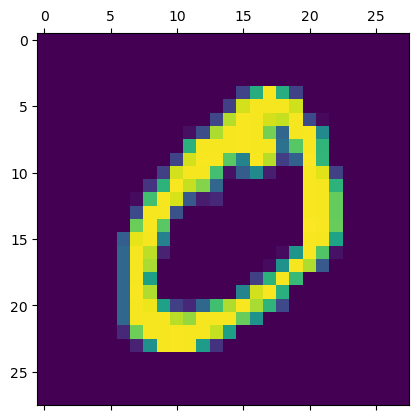

In [6]:
plt.matshow(x_train[1])
print(mnist)

In [11]:
x_train =x_train/255 
x_test=x_test/255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation='relu'), keras.layers.Dense(10,activation='softmax') ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6506 - accuracy: 0.8364 - val_loss: 0.3604 - val_accuracy: 0.9043
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3392 - accuracy: 0.9057 - val_loss: 0.3011 - val_accuracy: 0.9165
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2909 - accuracy: 0.9185 - val_loss: 0.2650 - val_accuracy: 0.9271
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2603 - accuracy: 0.9273 - val_loss: 0.2442 - val_accuracy: 0.9309
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2369 - accuracy: 0.9345 - val_loss: 0.2233 - val_accuracy: 0.9370
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2180 - accuracy: 0.9391 - val_loss: 0.2075 - val_accuracy: 0.9425
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2022 - accuracy: 0.9426 - val_loss: 0.1941 - val_accuracy:

In [16]:
test_loss,test_acc=model.evaluate(x_test,y_test) 
print("Loss=%.3f" %test_loss) 
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 932us/step - loss: 0.1649 - accuracy: 0.9528
Loss=0.165
Accuracy=0.953


313/313 [==============================] - 0s 783us/step
The handwritten number is 3


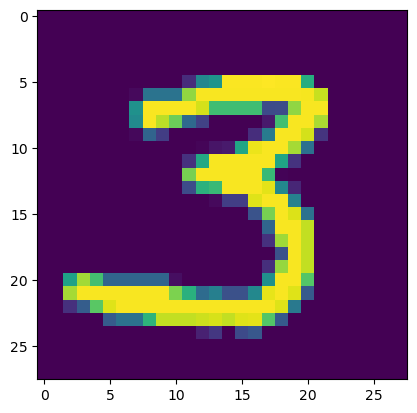

In [17]:
import random 
n=random.randint(0,9999) 
plt.imshow(x_test[n]) 
plt.show 
prediction=model.predict(x_test) 
print("The handwritten number is %d" % np.argmax(prediction[n]))

In [18]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1) 
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels) 
print('Confusion Matrix of the test:\n', confusion_matrix)

313/313 [==============================] - 0s 1ms/step
Confusion Matrix of the test:
 tf.Tensor(
[[ 967    0    1    2    0    3    5    1    1    0]
 [   0 1115    2    2    0    1    4    2    9    0]
 [   7    2  978   10    7    1    8    8    9    2]
 [   1    0    4  966    1   18    0   11    7    2]
 [   1    1    4    1  928    0   14    3    5   25]
 [   8    1    1   19    3  835   10    2    7    6]
 [  12    3    1    1    5   12  920    1    3    0]
 [   2    7   19    7    4    1    0  973    2   13]
 [   6    1    4   23    4    7   12    8  907    2]
 [   7    6    2   16   19    5    1   11    3  939]], shape=(10, 10), dtype=int32)
